In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df=pd.read_csv(r"C:\Users\Rohit\Downloads\Airbnb NYC 2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [43]:
df['revenue']=df.price*df.minimum_nights
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,800


In [92]:
df.revenue.sum()

62802340

In [51]:
revenue=df.groupby('room_type')['revenue'].sum()
revenue=pd.DataFrame(revenue)
revenue

,revenue
room_type,
Entire home/apt,47981638
Private room,14357673
Shared room,463029


Text(0.5, 1.0, 'Distribution of Revenue by Room type')

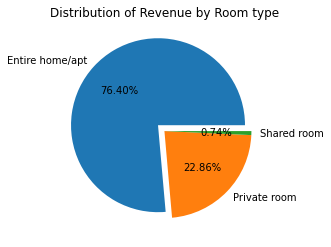

In [91]:
plt.pie(revenue.revenue,labels=revenue.index,autopct='%0.2f%%',explode=[0.1,0,0])
plt.title("Distribution of Revenue by Room type")

In [35]:
room_type1 = df.room_type.value_counts()
df_room_type = pd.DataFrame(room_type1)

In [36]:
df_room_type

,room_type
Entire home/apt,25409
Private room,22326
Shared room,1160


Text(0.5, 1.0, 'Distribution by Room type')

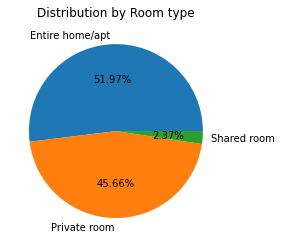

In [96]:
plt.pie(df_room_type.room_type,labels=df_room_type.index,autopct="%0.2f%%",radius=1)
plt.title("Distribution by Room type")

In [38]:
df_neighbourhood_group=pd.DataFrame(df.neighbourhood_group.value_counts())
df_neighbourhood_group

,neighbourhood_group
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


<BarContainer object of 5 artists>

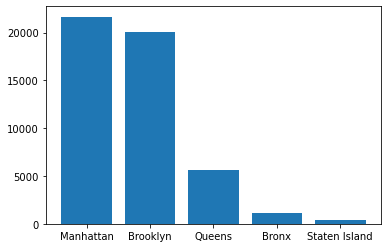

In [69]:
plt.bar(df_neighbourhood_group.index,df_neighbourhood_group.neighbourhood_group)

In [4]:
df.minimum_nights.max()

1250

In [5]:
price=df.price
bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
bin_freqs = {k: 0 for k in bins}

In [94]:
price_counts = pd.cut(df['price'],bins).value_counts().sort_index()
price_counts

(0, 1000]        48645
(1000, 2000]       153
(2000, 3000]        41
(3000, 4000]        13
(4000, 5000]        12
(5000, 6000]         4
(6000, 7000]         5
(7000, 8000]         4
(8000, 9000]         1
(9000, 10000]        6
Name: price, dtype: int64

Text(0.5, 1.0, 'Distribution by Price Range')

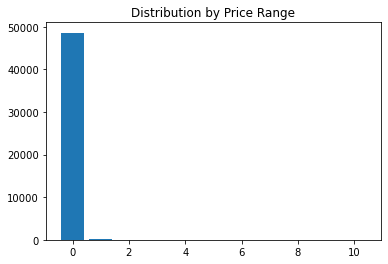

In [95]:
plt.bar(range(len(bin_freqs)), list(bin_freqs.values()), align='center')
plt.title("Distribution by Price Range")

In [11]:
df1=df[["neighbourhood_group","room_type"]]
df1

,neighbourhood_group,room_type
0,Brooklyn,Private room
1,Manhattan,Entire home/apt
2,Manhattan,Private room
3,Brooklyn,Entire home/apt
4,Manhattan,Entire home/apt
...,...,...
48890,Brooklyn,Private room
48891,Brooklyn,Private room
48892,Manhattan,Entire home/apt
48893,Manhattan,Shared room


In [12]:
my_dict=dict(zip(df.neighbourhood_group,df.room_type))
my_dict

{'Brooklyn': 'Private room',
 'Manhattan': 'Private room',
 'Queens': 'Private room',
 'Staten Island': 'Private room',
 'Bronx': 'Entire home/apt'}

In [13]:
private_rooms=df.groupby("neighbourhood_group")["room_type"].apply(lambda x:(x=="Private room").sum()).reset_index(name="count")

Text(0.5, 1.0, 'Distribution of Private Rooms by Neighbourhood Group')

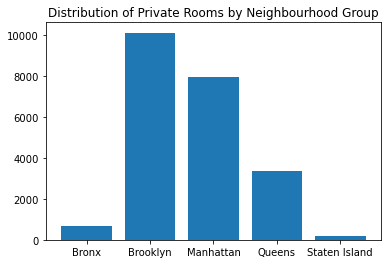

In [86]:
plt.bar(private_rooms['neighbourhood_group'],private_rooms['count'])
plt.title("Distribution of Private Rooms by Neighbourhood Group")

Text(0.5, 1.0, 'Distribution of Private Rooms by Neighbourhood Group')

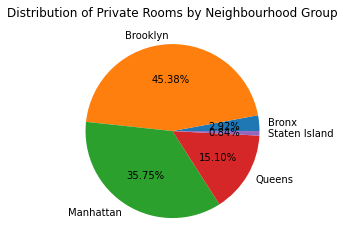

In [82]:
plt.pie(private_rooms['count'],labels=private_rooms['neighbourhood_group'],autopct='%0.2f%%')
plt.title("Distribution of Private Rooms by Neighbourhood Group")

In [15]:
shared_rooms=df.groupby("neighbourhood_group")["room_type"].apply(lambda x:(x=="Shared room").sum()).reset_index(name="count")

Text(0.5, 1.0, 'Distribution of Shared Rooms by Neighbourhood Group')

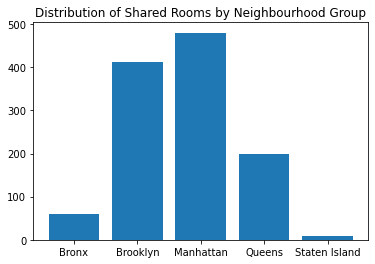

In [84]:
plt.bar(shared_rooms['neighbourhood_group'],shared_rooms['count'])
plt.title("Distribution of Shared Rooms by Neighbourhood Group")

Text(0.5, 1.0, 'Distribution of Shared Rooms by Neighbourhood Group')

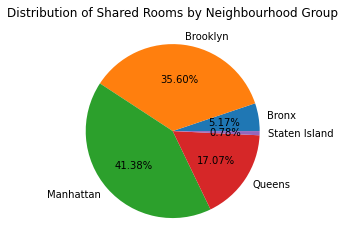

In [81]:
plt.pie(shared_rooms['count'],labels=shared_rooms['neighbourhood_group'],autopct='%0.2f%%')
plt.title("Distribution of Shared Rooms by Neighbourhood Group")

In [17]:
entire_home=df.groupby("neighbourhood_group")["room_type"].apply(lambda x:(x=="Entire home/apt").sum()).reset_index(name="count")

Text(0.5, 1.0, 'Distribution of Entire home by Neighbourhood Group')

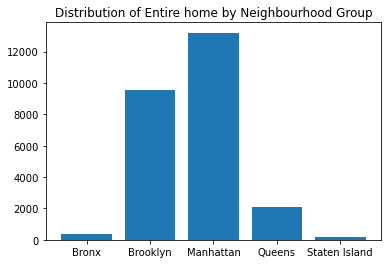

In [85]:
plt.bar(entire_home['neighbourhood_group'],entire_home['count'])
plt.title("Distribution of Entire home by Neighbourhood Group")

Text(0.5, 1.0, 'Distribution of Entire home by Neighbourhood Group')

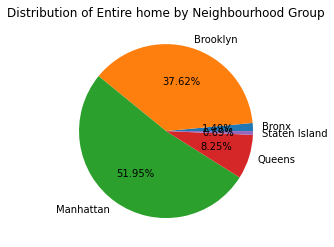

In [83]:
plt.pie(entire_home['count'],labels=entire_home['neighbourhood_group'],autopct='%0.2f%%')
plt.title("Distribution of Entire home by Neighbourhood Group")